In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os 
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
import pickle
df = pd.read_pickle('D:\Desktop\data_compressed.pkl')

In [ ]:
df.shape

(5531451, 190)

In [ ]:
df_columns = df.columns.to_list()
df_columns[-1]

In [ ]:
df.head()

In [ ]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_features = [col for col in df if col not in cat_features + ['S_2', 'customer_ID', 'B_31', 'D_87']]
binary_features = ['B_31', 'D_87']

In [ ]:
sampled_df = df.iloc[:15000, :]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
feature_array = enc.fit_transform(sampled_df[['D_63', 'D_64']]).toarray()
feature_labels = enc.categories_
feature_labels = np.concatenate((np.array(feature_labels)[0], np.array(feature_labels)[1]), axis=0)

In [ ]:
cat_enc_features = pd.DataFrame(feature_array, columns=feature_labels)
cat_enc_features.head()

,CL,CO,CR,XL,XM,XZ,-1,O,R,U,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
new_sampled_df = pd.concat([cat_enc_features, sampled_df], axis=1)

In [ ]:
new_sampled_df.head()

,CL,CO,CR,XL,XM,XZ,-1,O,R,U,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [ ]:
feature_labels = feature_labels.tolist()
feature_labels

['CL', 'CO', 'CR', 'XL', 'XM', 'XZ', '-1', 'O', 'R', 'U', nan]

In [ ]:
aggregated_num = new_sampled_df.groupby('customer_ID')[num_features + feature_labels].agg(['mean', 'median', 'max', 'min', 'std'])
aggregated_cat = new_sampled_df.groupby('customer_ID')[cat_features].agg(['count', 'nunique'])

In [ ]:
df_features = pd.concat([aggregated_cat, aggregated_num], axis = 1)
df_features.reset_index(inplace = True)
df_features_sharp = df_features.drop('customer_ID', axis = 1)
df_features_sharp.head()

B_30          B_38         D_114         D_116         D_117          ...  \
  count nunique count nunique count nunique count nunique count nunique  ...   
0    13       1    13       1    13       1    13       1    13       1  ...   
1    13       1    13       1    13       1    13       1    13       1  ...   
2    13       1    13       1    13       2    13       1    13       1  ...   
3    13       1    13       1    13       1    13       1    13       2  ...   
4    13       1    13       2    13       1    13       1    13       1  ...   

     U                        NaN                        
  mean median  max  min  std mean median  max  min  std  
0  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
1  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
2  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
3  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
4  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  

[5 rows x 952 columns]

In [ ]:
train_labels = pd.read_csv(r"D:\Desktop\train_new\train_labels.csv")
train_labels_sharp = train_labels.iloc[:1251]

In [ ]:
X = df_features_sharp
y = train_labels_sharp.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state = 42)
X_train, X_test = X_train.reset_index(), X_test.reset_index()  
X_train, X_test = X_train.drop('index', axis=1), X_test.drop('index', axis=1)

LightGBM adds nodes to trees based on the gain from adding that node, regardless of depth: 

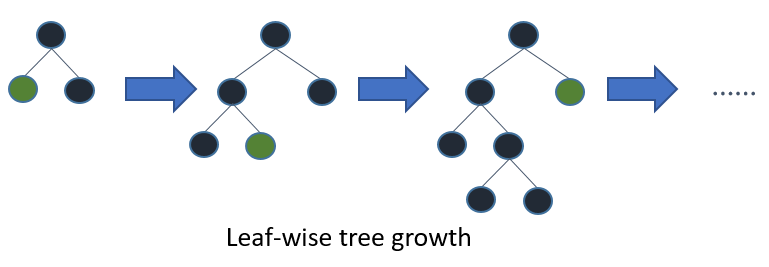

Because of this growth strategy, it isn’t straightforward to use max_depth alone to limit the complexity of trees. The num_leaves parameter sets the maximum number of nodes per tree. Decrease num_leaves to reduce training time.

In [ ]:
clf = LGBMClassifier(n_estimators = 50000, max_depth=5,
                    random_state = 0, boosting_type = 'goss',
                    extra_trees = True)

In [ ]:
clf.fit(X_train, Y_train,
       eval_set = [(X_test, Y_test)],
       callbacks = [early_stopping(50),
                   log_evaluation(0)])

In [ ]:
LGBMClassifier(boosting_type = 'goss', extra_trees = True, max_depth = 5,
               n_estimators = 50000, random_state = 0)

ypred = pd.DataFrame(y_test.copy(deep = True))
ypred = y_pred.rename(columns = {'target':'prediction'})
ypred.head(5)

In [ ]:
ypred['prediction'] = clf.predict_proba(xtest)[:,1]
ypred.head(5)

In [ ]:
metrics = pd.DataFrame(
        {"scores" : [model.oob_score_, model.score(X_test, y_test), roc_auc_score(y_test, y_predict_proba), f1_score(y_test, y_pred)]},
        index = ["oob_score", "accuracy", "roc_auc", "f1_score"]
)

In [ ]:
metrics

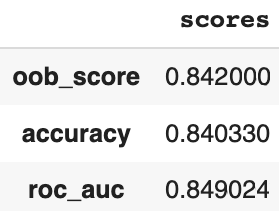



For better accuracy this might work: 

*   use large `max_bin` (may be slower)
*   use small learning_rate with large `num_iterations`
*   use large `num_leaves` (may cause over-fitting)
*   *use bigger training data* (in the case of the competition we have chosen, this requirement has already been exceeded)
*   try `dart`


